In [202]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [203]:
df = pd.read_csv("C:\\Users\\prith\\Downloads\\train (1).csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [179]:
df2 = pd.read_csv("C:\\Users\\prith\\Downloads\\test.csv")
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [180]:
#features = ['MSSubClass', 'LotFrontage', 'LotArea', 'YrSold','MoSold']
#features = ['LotArea']
target = 'SalePrice'
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features2 = df2.select_dtypes(include=['object', 'category']).columns.tolist()

In [181]:
X_train = df.drop(columns=[target]) 
y_train = df[target]
X_test = df2

In [182]:
# missing_rows = X_train.index[X_train.isnull().any(axis=1) | y_train.isnull()]
X_train_cleaned = X_train.fillna(0)
y_train_cleaned = y_train.fillna(0)
X_test_cleaned = X_test.fillna(0)
print(X_train_cleaned.shape)
print(y_train_cleaned.shape)

(1460, 80)
(1460,)


In [185]:
X_train_encoded = pd.get_dummies(X_train_cleaned, columns=categorical_features)
X_test_encoded = pd.get_dummies(X_test_cleaned, columns=categorical_features2)
additional_columns = set(X_train_encoded.columns) - set(X_test_encoded.columns)
additional_columns2 = set(X_test_encoded.columns) - set(X_train_encoded.columns)
X_train_encoded=X_train_encoded.drop(columns=additional_columns)
X_test_encoded=X_test_encoded.drop(columns=additional_columns2)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [197]:
k=3

In [198]:
knn_model = KNeighborsRegressor(n_neighbors=k)

In [199]:
knn_model.fit(X_train_scaled, y_train_cleaned)

KNeighborsRegressor(n_neighbors=3)

In [200]:
y_pred = knn_model.predict(X_test_scaled)

In [201]:
y_pred

array([120633.33333333, 168166.66666667, 187666.66666667, ...,
       128833.33333333, 109833.33333333, 188966.66666667])

In [204]:
features = df.drop(columns=['SalePrice'])

In [206]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
features=features.fillna(0)
features = pd.get_dummies(features, columns=categorical_features)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [207]:
k=3

In [208]:
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

C:\Users\prith\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [210]:
numeric_columns = features.select_dtypes(include=['float64', 'int64']).columns
cluster_means = df.groupby('Cluster')[numeric_columns].mean()

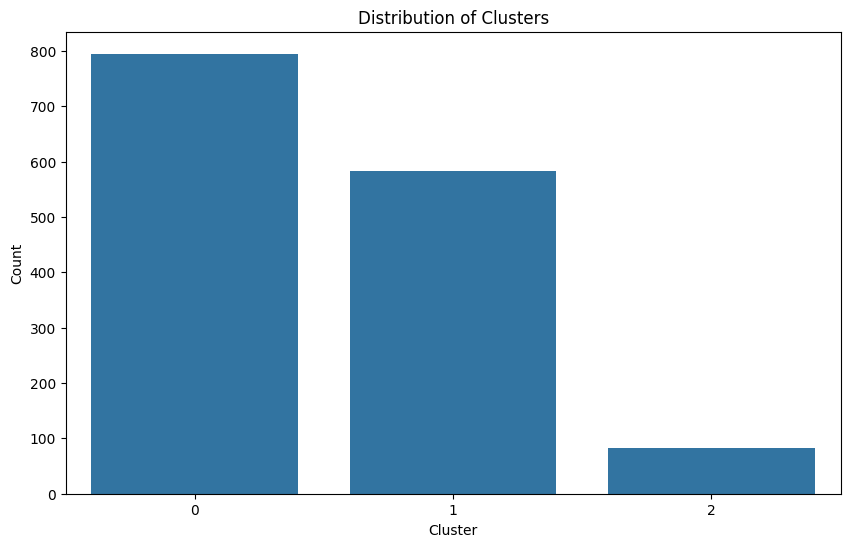

In [211]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [212]:
print("Cluster Means:")
print(cluster_means)

Cluster Means:
                 Id  MSSubClass  LotFrontage       LotArea  OverallQual  \
Cluster                                                                   
0        741.656604   52.591195    68.368992  10552.343396     5.393711   
1        719.118353   60.746141    73.808732  10894.416810     7.271012   
2        703.256098   71.280488    60.400000   7487.939024     4.609756   

         OverallCond    YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  \
Cluster                                                                  ...   
0           5.905660  1953.106918   1973.640252   65.680101  400.035220  ...   
1           5.137221  2000.120069   2001.579760  168.897569  532.101201  ...   
2           5.487805  1942.207317   1974.865854   13.609756  237.451220  ...   

         GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
Cluster                                                                  
0        427.198742   73.311950    31.162264      32.298113 